In [1]:
from ultralytics import YOLO
from utils import *
from IPython.display import Image, display, Video
from roboflow import Roboflow

In [2]:
rf = Roboflow(api_key="nz2w1UFnyFrM7e73WOzh")
project = rf.workspace("nyu-figsb").project("basketballdetection-cki6r")
dataset = project.version(27).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.228, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to basketballDetection-27 in yolov8::  41%|████      | 7226/17736 [05:04<07:22, 23.76it/s]  


KeyboardInterrupt: 

In [7]:
print(len(os.listdir("basketballDetection-27/train/images")))

8865


In [2]:
model = YOLO("weights/detect_large_v2.pt")

In [11]:
!yolo detect val model=weights/detect_large_v2.pt data=basketballDetection-25/data.yaml

Ultralytics YOLOv8.0.228 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /scratch/zw2688/Court_Vision_Model_Dev/basketballDetection-25/vali
/scratch/zw2688/conda_env/yolonas/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        548       3784      0.966      0.937      0.973      0.815
            basketball        548       1941      0.975       0.85  

In [21]:
video_path = "data/video_test_dataset/1/made_6.mp4"
cap, fps, width, height = get_video_info(video_path)

codec = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("output.mp4", codec, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    else:
        results = model(frame, device = "cuda", verbose = False)
        for r in results:
            out.write(r.plot())
            
out.release()
cap.release()
        
                    



In [20]:
Video("output.mp4")

In [14]:
import matplotlib.pyplot as plt

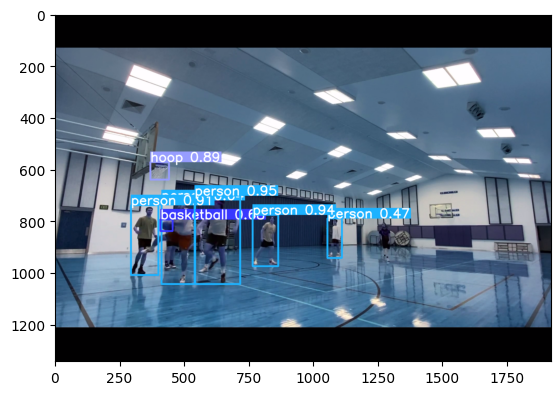

In [15]:
plt.imshow(r.plot())

In [22]:
import os

In [ ]:
len